In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import BFCM

In [2]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

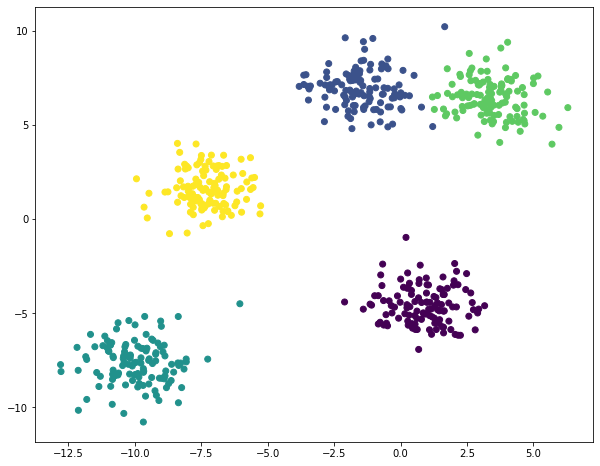

In [3]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=1, random_state=100)
plot_datapoints(X, y)

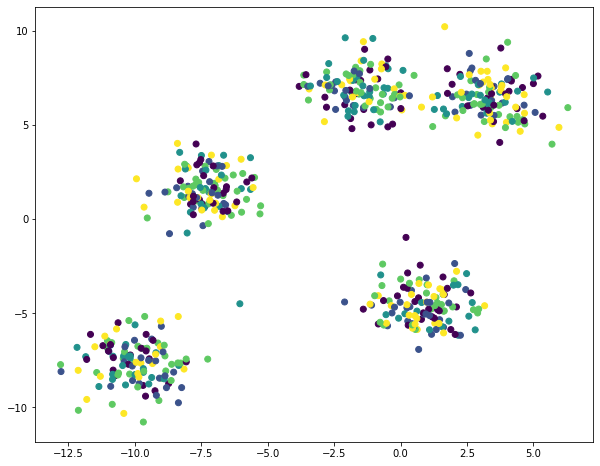

0) J_fcm: 19.412042934395796, V_XB: 52.002210778553
1) J_fcm: 12.20078904594544, V_XB: 176.9423272518804
2) J_fcm: 12.103562197218196, V_XB: 72.39278354777427
3) J_fcm: 11.635474922205228, V_XB: 27.680632709142056
4) J_fcm: 10.1625114096783, V_XB: 13.534809725145474
5) J_fcm: 8.427675425492572, V_XB: 9.69310986335505
6) J_fcm: 6.71495815777034, V_XB: 3.9926624317428536
7) J_fcm: 3.3229188361740887, V_XB: 0.9712766469609146
8) J_fcm: 1.8157671816952616, V_XB: 0.39279468807160206
9) J_fcm: 1.7689387816248792, V_XB: 0.3615982605998568
10) J_fcm: 1.7680769918214019, V_XB: 0.3581187752789988
11) J_fcm: 1.768055837120431, V_XB: 0.35761856927489283
12) J_fcm: 1.7680549496386562, V_XB: 0.3575489670345468
13) J_fcm: 1.7680548928364412, V_XB: 0.3575409493958018
14) J_fcm: 1.7680548884027956, V_XB: 0.3575406470699483


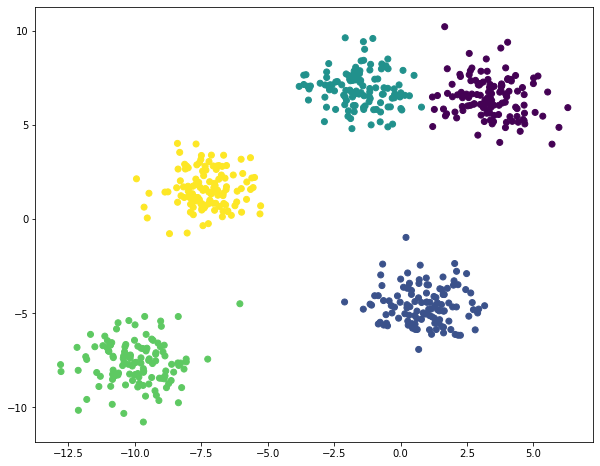

In [10]:
bfcm = BFCM(X, 5)
plot_datapoints(X, np.argmax(bfcm.run(0)[0], axis=1))
plot_datapoints(X, np.argmax(bfcm.run()[0], axis=1))